# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [77]:
# Checking the number of mice.
unique_mice_count = combined_data["Mouse ID"].nunique()
print(f"number of unique mice: {unique_mice_count}")

number of unique mice: 249


In [78]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

#display the duplicate entries
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [79]:
# Optional: Get all the data for the duplicate mouse ID.
# Identify the duplicate mouse IDs
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Retrieve all data for these duplicate mouse IDs
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the data for duplicate mouse IDs
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [80]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#Get list of duplicate mouse IDs
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

#Create a new datafreame by excluding the duplicate mouse IDs
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

#Display the number of unique mice in the cleaned data
cleaned_unique_mice_count = cleaned_data["Mouse ID"].nunique()
print(f"Number of unique mice after cleaning: {cleaned_unique_mice_count}")

#Display the cleaned data
cleaned_data.head()


Number of unique mice after cleaning: 248


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [81]:
# Checking the number of mice in the clean DataFrame.
cleaned_unique_mice_count = cleaned_data["Mouse ID"].nunique()
print(f"Number of unique mice in the cleaned data: {cleaned_unique_mice_count}")

Number of unique mice in the cleaned data: 248


## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

#Group the Data by 'Drug Regimen' and calculate the required summary statistics
regimen_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

#Calculate Summary Statistics
mean_tumor_volume = regimen_stats.mean()
median_tumor_volume = regimen_stats.median()
variance_tumor_volume = regimen_stats.var()
std_dev_tumor_volume = regimen_stats.std()
sem_tumor_volume = regimen_stats.sem()

# Assemble the summary statistics into a DataFrame
summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume, 
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
    })

# Display the Summary DataFrame
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

#Generate the summary statistics using the agg() method
summary_df = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)

#Display the summary DataFrame
summary_df

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

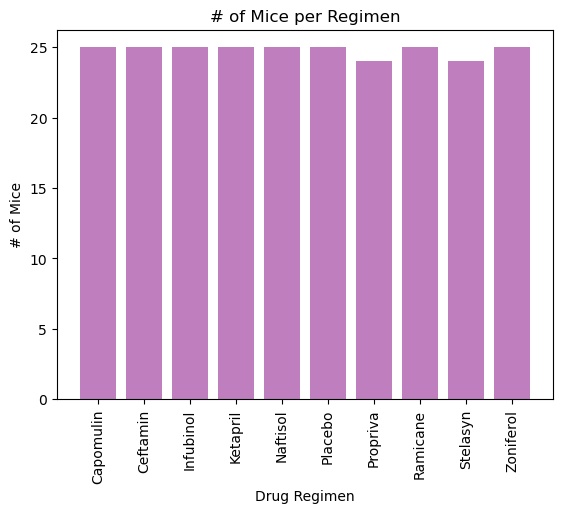

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
mice_count = cleaned_data.groupby("Drug Regimen")[["Mouse ID"]].nunique()
mice_count = mice_count.iloc[:,0]
x_axis = np.arange(len(mice_count))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_count.index,rotation="vertical")
plt.bar(x_axis, mice_count, color='purple', alpha=0.5, align="center")
plt.title("# of Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.show()
               

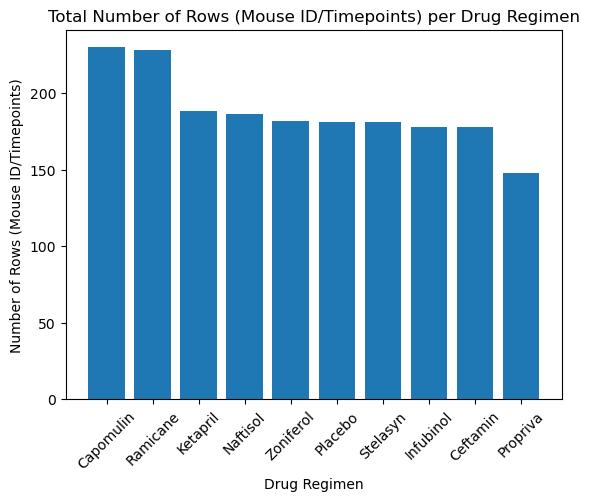

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
regimen_counts = cleaned_data["Drug Regimen"].value_counts()

# Generate the bar plot using pyplot
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title("Total Number of Rows (Mouse ID/Timepoints) per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

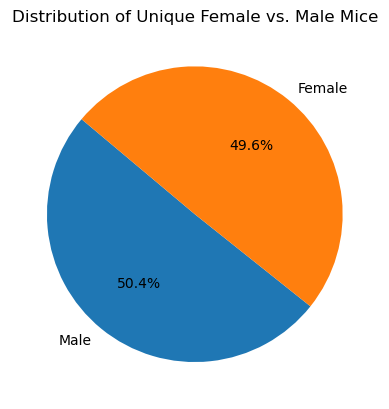

In [88]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_data.drop_duplicates(subset=["Mouse ID"])[["Mouse ID", "Sex"]]

# Calculate the counts of each gender
gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140, title="Distribution of Unique Female vs. Male Mice")
plt.ylabel("")  # Remove y-label for cleaner appearance
plt.show()

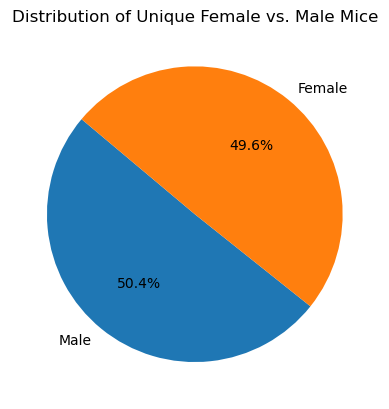

In [89]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
import matplotlib.pyplot as plt

# Get the unique mice with their gender
nique_mice = cleaned_data.drop_duplicates(subset=["Mouse ID"])[["Mouse ID", "Sex"]]

# Calculate the counts of each gender
gender_counts = unique_mice["Sex"].value_counts()

# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Unique Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Filter the data to include only the four specific treatment regimens
filtered_data = cleaned_data[cleaned_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"], how="left")

# Display the resulting DataFrame
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [92]:
# Put treatments into a list for for loop (and later for plot labels)
# List of treatments
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#Loop through each treatment to calculate IQR and detect outliers
for treatment in treatments:
    # Locate the rows for each drug regimen and get the final tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Append the tumor volume data to the list for later plotting
    tumor_vol_data.append(treatment_data)
    
    # Calculate the quartiles and IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Calculate the lower and upper bounds for potential outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers in the data
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print outliers for each treatment
    print(f"{treatment} potential outliers: {outliers}")

# tumor_vol_data will contain the tumor volumes organized by treatment


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


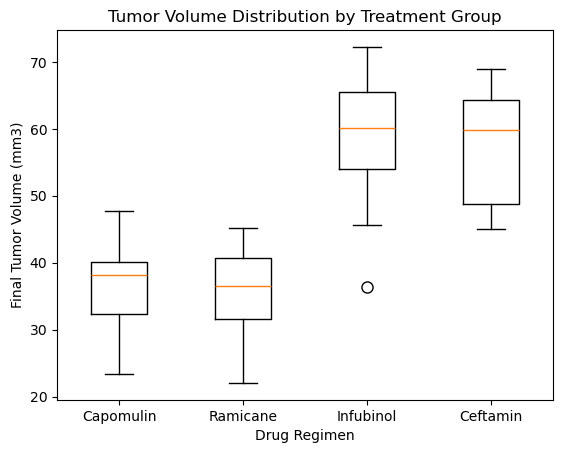

In [93]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Generate the box plot for tumor volumes across the four treatment regimens
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', color='red', markersize=8))
plt.title("Tumor Volume Distribution by Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

# Show the plot
plt.show()

## Line and Scatter Plots

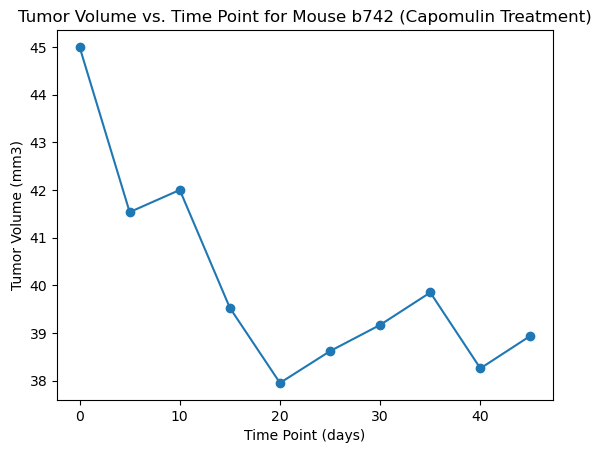

In [95]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "b742"  # Replace with any specific Mouse ID treated with Capomulin
mouse_data = cleaned_data[(cleaned_data["Mouse ID"] == mouse_id) & (cleaned_data["Drug Regimen"] == "Capomulin")]

# Generate the line plot for tumor volume vs. time point
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o")
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()

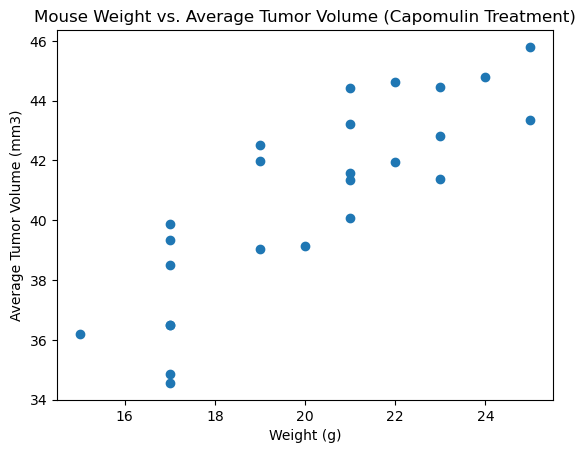

In [96]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for only the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capomulin_data.drop_duplicates(subset=["Mouse ID"])[["Mouse ID", "Weight (g)"]].set_index("Mouse ID")

# Merge the average tumor volume with mouse weight
capomulin_summary = pd.merge(mouse_weight, average_tumor_volume, on="Mouse ID")

# Generate the scatter plot
plt.scatter(capomulin_summary["Weight (g)"], capomulin_summary["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Treatment)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()


## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.84


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

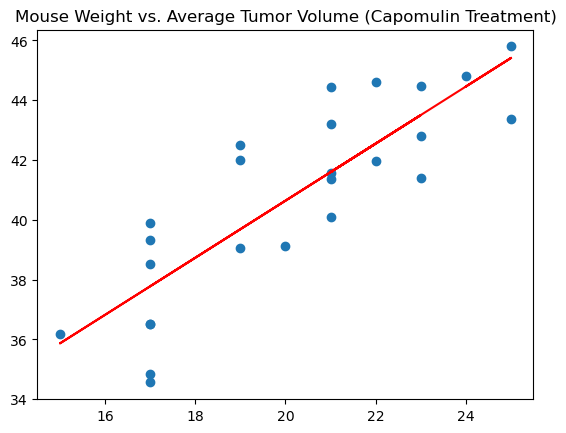

In [98]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress

# Extract the data for mouse weight and average tumor volume
x_values = capomulin_summary["Weight (g)"]
y_values = capomulin_summary["Tumor Volume (mm3)"]

# Calculate the correlation coefficient
correlation = pearsonr(x_values, y_values)[0]
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate regression line values
regression_line = slope * x_values + intercept

# Plot the scatter plot with the regression line
plt.scatter(x_values, y_values, label="Data points")
plt.plot(x_values, regression_line, color="red", label="Regression line")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Treatment)")
plt.xlabel
